In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
X = pd.read_csv('HealtyNormalized.csv')
# Importing the dataset
X['Fault'] = 0

y = pd.read_csv('combinedFault.csv')
y['Fault'] = 1


In [3]:
X.head(), y.head()

(        vsH       vbH  Fault
 0  0.000998 -0.000217      0
 1  0.001001 -0.000185      0
 2  0.001002 -0.000152      0
 3  0.001007 -0.000185      0
 4  0.001010 -0.000217      0,
         vsC       vbC  Fault
 0  0.039634  0.018847      1
 1  0.039634  0.018847      1
 2  0.039634  0.018518      1
 3  3.632150  0.015887      1
 4  4.148328  0.018518      1)

In [4]:
X = X.rename(columns={"vsH": "speed", "vbH": "vibration"})
y = y.rename(columns={"vsC": "speed", "vbC": "vibration"})

In [5]:
X.head(), y.head()

(      speed  vibration  Fault
 0  0.000998  -0.000217      0
 1  0.001001  -0.000185      0
 2  0.001002  -0.000152      0
 3  0.001007  -0.000185      0
 4  0.001010  -0.000217      0,
       speed  vibration  Fault
 0  0.039634   0.018847      1
 1  0.039634   0.018847      1
 2  0.039634   0.018518      1
 3  3.632150   0.015887      1
 4  4.148328   0.018518      1)

In [6]:
import seaborn as sb 
from pylab import rcParams

In [7]:
"""

%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
plt.rcParams['agg.path.chunksize'] = 20000000
"""

"\n\n%matplotlib inline\nrcParams['figure.figsize'] = 5,4\nsb.set_style('whitegrid')\nplt.rcParams['agg.path.chunksize'] = 20000000\n"

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vibration'>

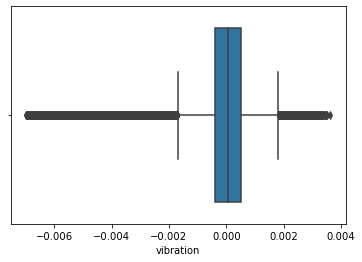

In [8]:
sb.boxplot(X['vibration'])

In [9]:
def find_normal_boundaries(df, variable):    
    # calculate the boundaries outside which lie the outliers for a Gaussian distribution    
    upper_boundary = df[variable].mean() + 10 * df[variable].std()
    lower_boundary = df[variable].mean() - 10 * df[variable].std()    
    return upper_boundary, lower_boundary


In [10]:
upper_boundary, lower_boundary = find_normal_boundaries(X, 'vibration')
print(upper_boundary, lower_boundary)

0.0071039730976409105 -0.0070003626852839


C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vibration'>

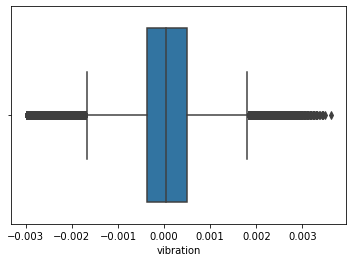

In [11]:
upper_boundary = 0.007
lower_boundary = -0.003

data2 = X[(X['vibration']<upper_boundary) & (X['vibration']>lower_boundary)]

X = data2
X.describe()

sb.boxplot(X['vibration'])

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vibration'>

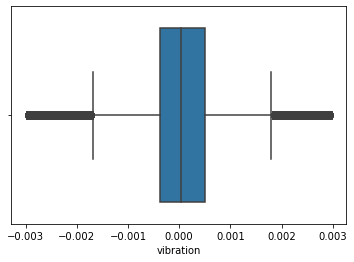

In [12]:
upper_boundary = 0.003
lower_boundary = -0.003

data2 = X[(X['vibration']<upper_boundary) & (X['vibration']>lower_boundary)]

X = data2
X.describe()

sb.boxplot(X['vibration'])

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vibration'>

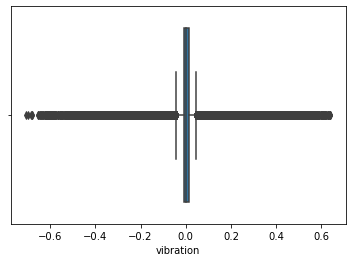

In [13]:
sb.boxplot(y['vibration'])

In [14]:
upper_boundary, lower_boundary = find_normal_boundaries(y, 'vibration')
print(upper_boundary, lower_boundary)

0.3326969678558227 -0.3299069979161344


C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vibration'>

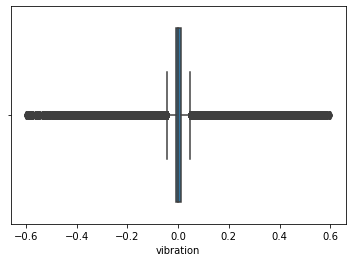

In [15]:
upper_boundary = 0.6
lower_boundary = -0.6

data2 = y[(y['vibration']<upper_boundary) & (y['vibration']>lower_boundary)]

y = data2
y.describe()

sb.boxplot(y['vibration'])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.33, random_state = 0)

y_train, y_test = train_test_split(y, test_size = 0.33, random_state = 0)

In [17]:
train = X_train.append(y_train)
train

,speed,vibration,Fault
572012,0.000009,-0.000445,0
1435082,0.000955,-0.000705,0
1803224,0.001022,-0.000250,0
615049,0.000998,-0.000315,0
1558947,0.000009,0.001408,0
...,...,...,...
152315,4.231508,0.008324,1
963398,0.039634,0.023451,1
117952,0.041935,-0.019957,1
1484420,0.039305,0.007666,1


In [18]:
test = X_test.append(y_test)
test

,speed,vibration,Fault
1456698,0.000009,-0.000575,0
1704724,0.000009,-0.000022,0
850351,0.000990,0.000465,0
1821345,0.001003,0.001083,0
892141,0.000009,-0.000055,0
...,...,...,...
1606811,3.977035,-0.096579,1
1209632,0.039634,-0.021930,1
228475,4.257481,0.009639,1
261846,0.039634,0.007008,1


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train))
train.sample(frac=1)

test = pd.DataFrame(scaler.transform(test))

In [20]:
train.shape

(2604180, 3)

In [21]:
test.shape

(1282657, 3)

In [22]:
train = train.values.reshape(-1, 1, 3)

In [23]:
test  = test.values.reshape(-1, 1, 3)

In [24]:
#pip install keras
train.shape

(2604180, 1, 3)

In [25]:
test.shape

(1282657, 1, 3)

In [26]:
from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential, load_model
from keras import regularizers

In [27]:
""" # Input layer:
model=Sequential([
    LSTM(32, activation='relu', input_shape=(train.shape[1],train.shape[2])),
    Dropout(0.2),
    RepeatVector(train.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(train.shape[2]))
])

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()"""

" # Input layer:\nmodel=Sequential([\n    LSTM(32, activation='relu', input_shape=(train.shape[1],train.shape[2])),\n    Dropout(0.2),\n    RepeatVector(train.shape[1]),\n    LSTM(32, activation='relu', return_sequences=True),\n    Dropout(0.2),\n    TimeDistributed(Dense(train.shape[2]))\n])\n\nmodel.compile(loss='mse',optimizer='adam', metrics=['accuracy'])\nmodel.summary()"

In [28]:
# Input layer:
model=Sequential([
    LSTM(10, activation='relu', input_shape=(train.shape[1],train.shape[2]),use_bias = True , bias_initializer = 'zeros'),
    Dropout(0.2),
    RepeatVector(train.shape[1]),
    LSTM(10, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(train.shape[2]))
])

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                560       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 10)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 10)             840       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 10)             0         
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 3)              33        
Total params: 1,433
Trainable params: 1,433
Non-trainable params: 0
______________________________________________________

In [29]:
# Train model for 100 epochs, batch size of 1000: 
NUM_EPOCHS=150
BATCH_SIZE=1000

history=model.fit(train,train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  shuffle=True)

Epoch 1/150
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0573 - accuracy: 0.8577 - val_loss: 0.0068 - val_accuracy: 0.9995
Epoch 2/150
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0259 - accuracy: 0.9436 - val_loss: 0.0073 - val_accuracy: 0.9995
Epoch 3/150
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0232 - accuracy: 0.9586 - val_loss: 0.0019 - val_accuracy: 0.9993
Epoch 4/150
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0223 - accuracy: 0.8999 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 5/150
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0211 - accuracy: 0.9175 - val_loss: 0.0026 - val_accuracy: 0.9995
Epoch 6/150
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0197 - accuracy: 0.9395 - val_loss: 0.0051 - val_accuracy: 0.9995
Epoch 7/150
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0192 - accuracy: 0.9358 - val_loss: 0.0062 - val_ac

2344/2344 [==============================] - 6s 2ms/step - loss: 0.0181 - accuracy: 0.9183 - val_loss: 0.0782 - val_accuracy: 0.9995
Epoch 58/150
2344/2344 [==============================] - 6s 2ms/step - loss: 0.0179 - accuracy: 0.9190 - val_loss: 0.0822 - val_accuracy: 0.9995
Epoch 59/150
2344/2344 [==============================] - 6s 2ms/step - loss: 0.0180 - accuracy: 0.9190 - val_loss: 0.0797 - val_accuracy: 0.9995
Epoch 60/150
2344/2344 [==============================] - 6s 2ms/step - loss: 0.0180 - accuracy: 0.9192 - val_loss: 0.0835 - val_accuracy: 0.9995
Epoch 61/150
2344/2344 [==============================] - 6s 2ms/step - loss: 0.0180 - accuracy: 0.9197 - val_loss: 0.0868 - val_accuracy: 0.9995
Epoch 62/150
2344/2344 [==============================] - 6s 2ms/step - loss: 0.0180 - accuracy: 0.9183 - val_loss: 0.0861 - val_accuracy: 0.9995
Epoch 63/150
2344/2344 [==============================] - 6s 2ms/step - loss: 0.0180 - accuracy: 0.9181 - val_loss: 0.0861 - val_accuracy

2344/2344 [==============================] - 6s 2ms/step - loss: 0.0143 - accuracy: 0.9183 - val_loss: 0.1520 - val_accuracy: 0.9995
Epoch 114/150
2344/2344 [==============================] - 6s 2ms/step - loss: 0.0143 - accuracy: 0.9182 - val_loss: 0.1586 - val_accuracy: 0.9995
Epoch 115/150
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0143 - accuracy: 0.9187 - val_loss: 0.1547 - val_accuracy: 0.9995
Epoch 116/150
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0143 - accuracy: 0.9182 - val_loss: 0.1600 - val_accuracy: 0.9995
Epoch 117/150
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0143 - accuracy: 0.9186 - val_loss: 0.1615 - val_accuracy: 0.9995
Epoch 118/150
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0143 - accuracy: 0.9182 - val_loss: 0.1634 - val_accuracy: 0.9995
Epoch 119/150
2344/2344 [==============================] - 6s 2ms/step - loss: 0.0143 - accuracy: 0.9183 - val_loss: 0.1665 - val_ac

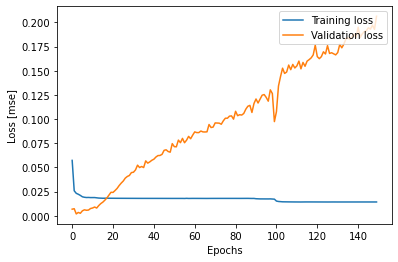

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss [mse]')
plt.show()

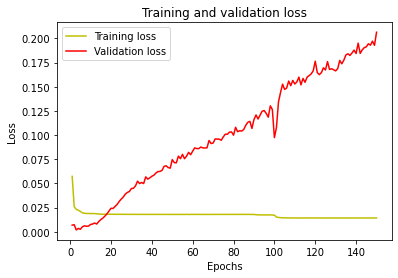

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

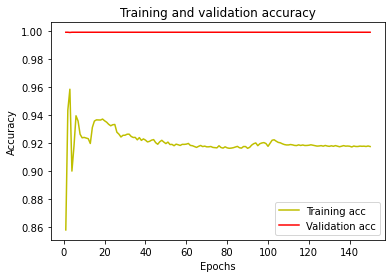

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
pred_train = model.predict(train)

In [34]:
pred_train = pred_train.reshape(pred_train.shape[0],pred_train.shape[2])
train = train.reshape(train.shape[0],train.shape[2])

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


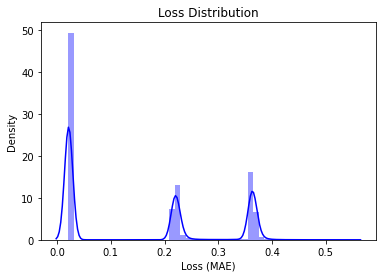

In [35]:
import seaborn as sns

scored = np.mean(np.abs(pred_train-train), axis = 1)
plt.figure()
g = sns.distplot(scored, bins = 50, kde= True, color = 'blue');
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [36]:
TH = 0.1
pred_train = pd.DataFrame(pred_train)
scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(pred_train-train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

In [37]:
scored_train['Loss_mae'].mean()

0.1553902402482121

Text(0, 0.5, 'Loss (MAE)')

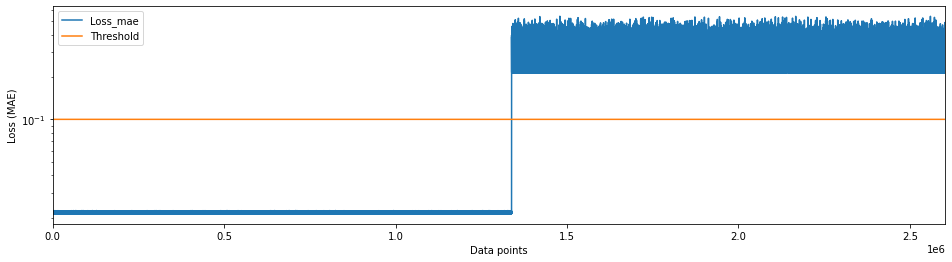

In [38]:
scored_train.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_train)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [39]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.021498,0.1,False
1,0.021352,0.1,False
2,0.021473,0.1,False
3,0.021457,0.1,False
4,0.022013,0.1,False
...,...,...,...
2604175,0.219851,0.1,True
2604176,0.366576,0.1,True
2604177,0.365470,0.1,True
2604178,0.362166,0.1,True


In [40]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

         Loss_mae  Threshold  Anomaly
1338428  0.223830        0.1     True
1338429  0.361897        0.1     True
1338430  0.361928        0.1     True
1338431  0.363933        0.1     True
1338432  0.360766        0.1     True
...           ...        ...      ...
2604175  0.219851        0.1     True
2604176  0.366576        0.1     True
2604177  0.365470        0.1     True
2604178  0.362166        0.1     True
2604179  0.362507        0.1     True

[1265752 rows x 3 columns]
(1265752, 3)


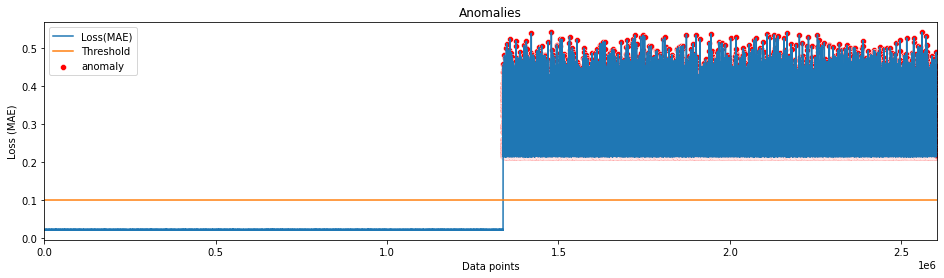

In [41]:
f, (ax1) = plt.subplots(figsize=(16, 4))
ax1.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
ax1.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_train.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [42]:
pred_test = model.predict(test)

In [43]:
score = model.evaluate(test,test)
score

40084/40084 [==============================] - 20s 507us/step - loss: 0.1006 - accuracy: 0.9998


[0.10055975615978241, 0.999763011932373]

In [44]:
pred_test = pred_test.reshape(pred_test.shape[0],pred_test.shape[2])
test = test.reshape(test.shape[0],test.shape[2])

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


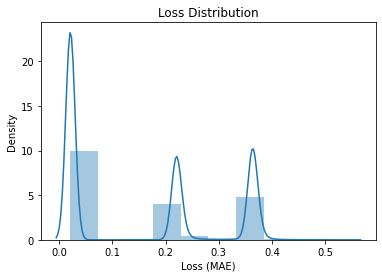

In [45]:
import seaborn as sns

scored_test = np.mean(np.abs(pred_test-test), axis = 1)
plt.figure()
g = sns.distplot(scored_test, bins = 10, kde= True);
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [46]:
scored_test = pd.DataFrame()
scored_test['Loss_mae'] = np.mean(np.abs(pred_test-test), axis = 1)
scored_test['Threshold'] = TH
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']

scored_test

,Loss_mae,Threshold,Anomaly
0,0.021462,0.1,False
1,0.021615,0.1,False
2,0.021674,0.1,False
3,0.021845,0.1,False
4,0.021606,0.1,False
...,...,...,...
1282652,0.242046,0.1,True
1282653,0.366155,0.1,True
1282654,0.220555,0.1,True
1282655,0.361962,0.1,True


In [47]:
scored_test['Loss_mae'].mean()

0.1553433579761782

Text(0, 0.5, 'Loss (MAE)')

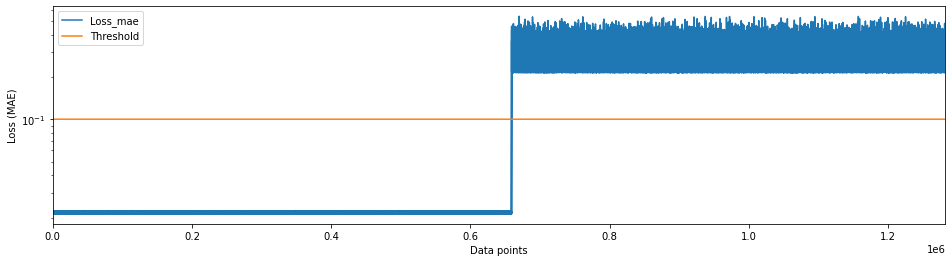

In [48]:
scored_test.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_test)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [49]:
IR_anomalies = scored_test[scored_test['Anomaly'] == True]
print(IR_anomalies)
print(IR_anomalies.shape)

         Loss_mae  Threshold  Anomaly
659226   0.219799        0.1     True
659227   0.362719        0.1     True
659228   0.365171        0.1     True
659229   0.365281        0.1     True
659230   0.221115        0.1     True
...           ...        ...      ...
1282652  0.242046        0.1     True
1282653  0.366155        0.1     True
1282654  0.220555        0.1     True
1282655  0.361962        0.1     True
1282656  0.366390        0.1     True

[623431 rows x 3 columns]
(623431, 3)


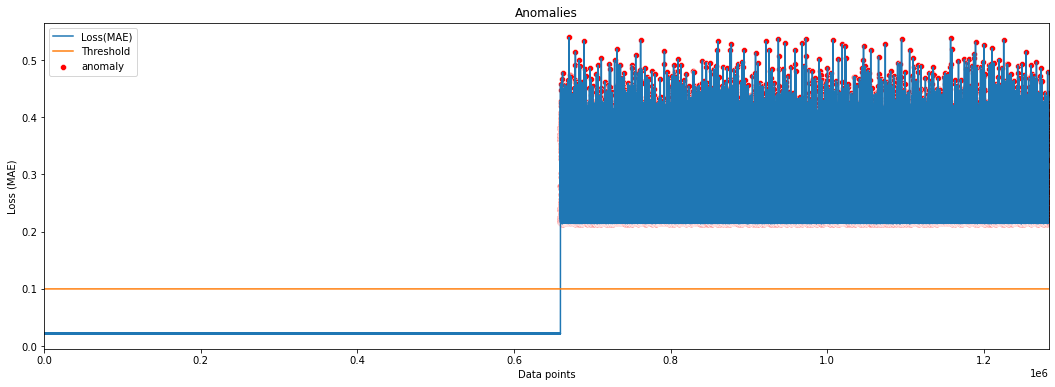

In [50]:
f, (ax2) = plt.subplots(figsize=(18, 6))
ax2.plot(scored_test.index, scored_test.Loss_mae, label='Loss(MAE)');
ax2.plot(scored_test.index, scored_test.Threshold, label='Threshold')
g = sns.scatterplot(x=IR_anomalies.index , y=IR_anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_test.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [51]:
print(score[1])

0.999763011932373


In [52]:
print("Accuracy: {:.2f}%".format(score[1]*100))

Accuracy: 99.98%


In [53]:
print("Anomalies: {}".format(IR_anomalies['Anomaly'].count()))

Anomalies: 623431


In [54]:
# Seperating Normal and Faulty dataset
x = scored_test['Anomaly'].count() / 2

In [55]:
normal_test = scored_test[scored_test.index < x]
normal_test

,Loss_mae,Threshold,Anomaly
0,0.021462,0.1,False
1,0.021615,0.1,False
2,0.021674,0.1,False
3,0.021845,0.1,False
4,0.021606,0.1,False
...,...,...,...
641324,0.021628,0.1,False
641325,0.021478,0.1,False
641326,0.021787,0.1,False
641327,0.021308,0.1,False


In [56]:
IR_test = scored_test[scored_test.index >= x]
IR_test

,Loss_mae,Threshold,Anomaly
641329,0.021561,0.1,False
641330,0.021764,0.1,False
641331,0.021238,0.1,False
641332,0.021651,0.1,False
641333,0.021474,0.1,False
...,...,...,...
1282652,0.242046,0.1,True
1282653,0.366155,0.1,True
1282654,0.220555,0.1,True
1282655,0.361962,0.1,True


In [57]:
TP = normal_test[normal_test['Anomaly'] == False]
TP = TP['Anomaly'].count()
print("True Positives: {}".format(TP))

FP = normal_test[normal_test['Anomaly'] == True]
FP = FP['Anomaly'].count()
print("False Positives: {}".format(FP))

TN = IR_test[IR_test['Anomaly'] == True]
TN = TN['Anomaly'].count()
print("True Negatives: {}".format(TN))

FN = IR_test[IR_test['Anomaly'] == False]
FN = FN['Anomaly'].count()
print("False Negatives: {}".format(FN))

True Positives: 641329
False Positives: 0
True Negatives: 623431
False Negatives: 17897


In [58]:
Precision = TP / (TP + FP)
print("Precision: {:.2f}%".format(Precision*100))

Recall = TP / (TP + FN)
print("Recall: {:.3f}%".format(Recall*100))

F1Score = (2*Precision*Recall)/(Precision+Recall)
print("F1 Score: {:.2f}%".format(F1Score*100))

Accuracy = ( TP + TN ) / ( TP + TN + FN + FP )
print("Accuracy: {:.2f}%".format(Accuracy*100))

Precision: 100.00%
Recall: 97.285%
F1 Score: 98.62%
Accuracy: 98.60%
